In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("mall customers - mall customers.csv")

In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# dataset.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [6]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.rename(columns={'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [8]:
dataset.rename(columns={'Annual Income (k$)':'income'},inplace=True)

In [9]:
dataset.head()

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
dataset.shape

(200, 5)

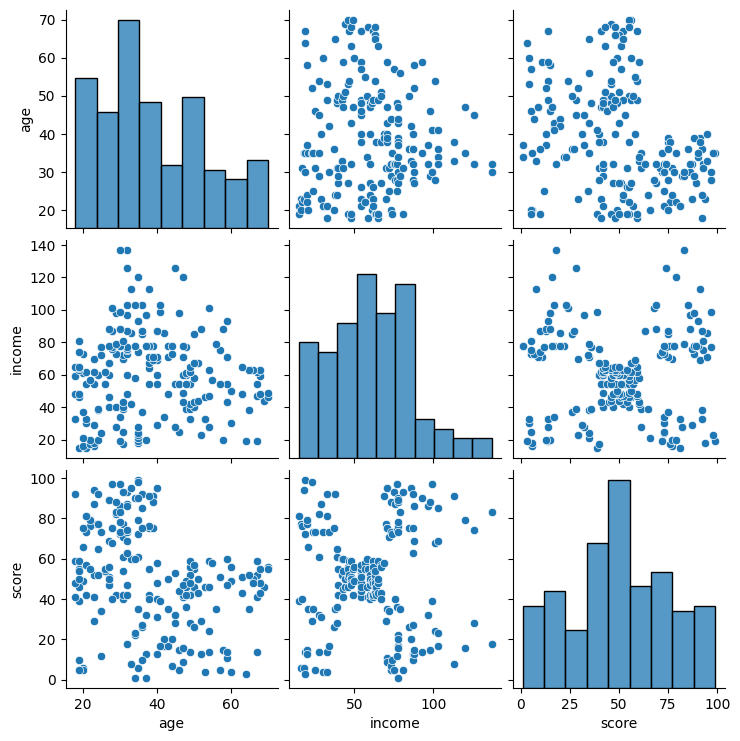

In [11]:
import seaborn as sns
sns.pairplot(dataset[['age','income','score']])

# Clustering : income vs score 

In [28]:
from sklearn.cluster import KMeans

In [29]:
KMeans1=KMeans()

In [30]:
KMeans1.fit(dataset[['score','income']]) #default: n_clusters=8

/home/shahriarkabir/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [31]:
dataset['grouping1']=KMeans1.predict(dataset[['score','income']])

In [32]:
dataset.tail()

,CustomerID,Gender,age,income,score,grouping1
195,196,Female,35,120,79,2
196,197,Female,45,126,28,7
197,198,Male,32,126,74,2
198,199,Male,32,137,18,7
199,200,Male,30,137,83,2


In [33]:
centers1=KMeans1.cluster_centers_
centers1

array([[ 51.3255814 ,  47.06976744],
       [ 13.39130435,  79.73913043],
       [ 82.72727273, 108.18181818],
       [ 19.52380952,  25.14285714],
       [ 46.76744186,  63.41860465],
       [ 80.04761905,  25.0952381 ],
       [ 81.89285714,  78.03571429],
       [ 22.        , 109.7       ]])

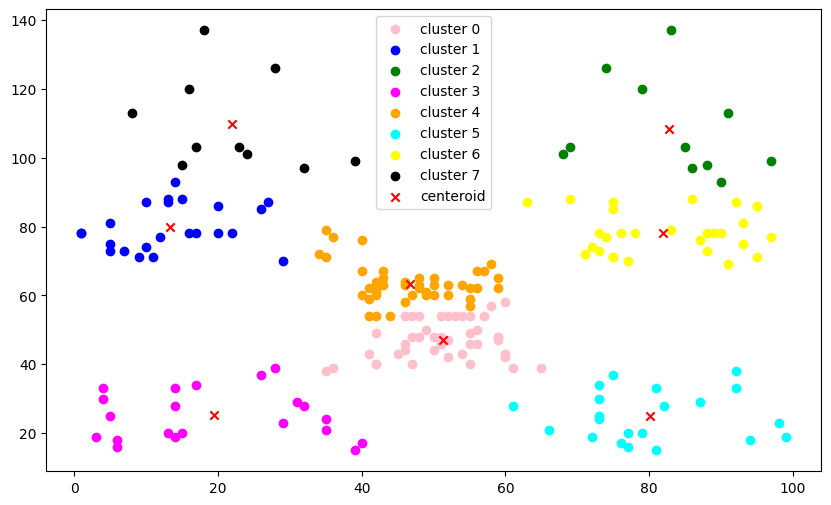

In [34]:
dataset0 = dataset[dataset.grouping1 == 0]
dataset1 = dataset[dataset.grouping1 == 1]
dataset2 = dataset[dataset.grouping1 == 2]
dataset3 = dataset[dataset.grouping1 == 3]
dataset4 = dataset[dataset.grouping1 == 4]
dataset5 = dataset[dataset.grouping1 == 5]
dataset6 = dataset[dataset.grouping1 == 6]
dataset7 = dataset[dataset.grouping1 == 7]
plt.figure(figsize=(10,6))
plt.scatter(dataset0.score, dataset0.income, color='pink', label='cluster 0')
plt.scatter(dataset1.score, dataset1.income, color='blue', label='cluster 1')
plt.scatter(dataset2.score, dataset2.income, color='green', label='cluster 2')
plt.scatter(dataset3.score, dataset3.income, color='magenta', label='cluster 3')
plt.scatter(dataset4.score, dataset4.income, color='orange', label='cluster 4')
plt.scatter(dataset5.score, dataset5.income, color='cyan', label='cluster 5')
plt.scatter(dataset6.score, dataset6.income, color='yellow', label='cluster 6')
plt.scatter(dataset7.score, dataset7.income, color='black', label='cluster 7')

plt.scatter(centers1[:,0],centers1[:,1],color='red',marker='x',label="centeroid")
plt.legend()

# Optimization by wcss

In [39]:
wcss=[]
cluster_n=range(1,15)
for k in cluster_n:
    KMeans2=KMeans(n_clusters=k)
    KMeans2.fit(dataset[['score','income']])
    wcss.append(KMeans2.inertia_)

/home/shahriarkabir/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shahriarkabir/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shahriarkabir/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shahriarkabir/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

In [40]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 25018.576334776335,
 21794.8856090982,
 19653.383606248823,
 17856.510762106107,
 16049.714149902386,
 14256.112261612263,
 13164.813191456222]

Text(0, 0.5, 'wcss')

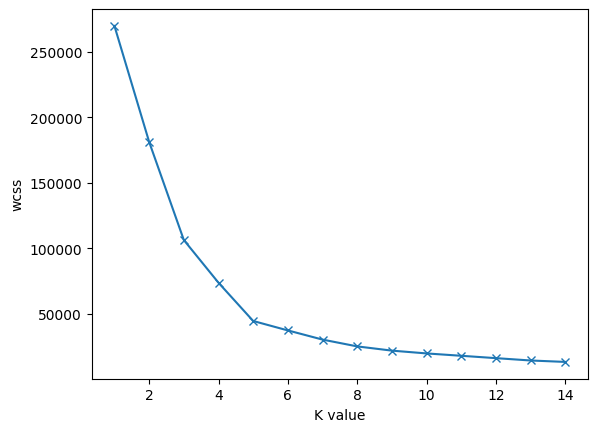

In [43]:
#line plot 
plt.plot(range(1,15),wcss,marker='x')
plt.xlabel('K value')
plt.ylabel('wcss')

In [48]:
#kneed installation
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install kneed[plot] # To also install plotting functions for quick visualizations

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
from kneed import KneeLocator

In [56]:
knl=KneeLocator(cluster_n,wcss,direction='decreasing',curve='convex')

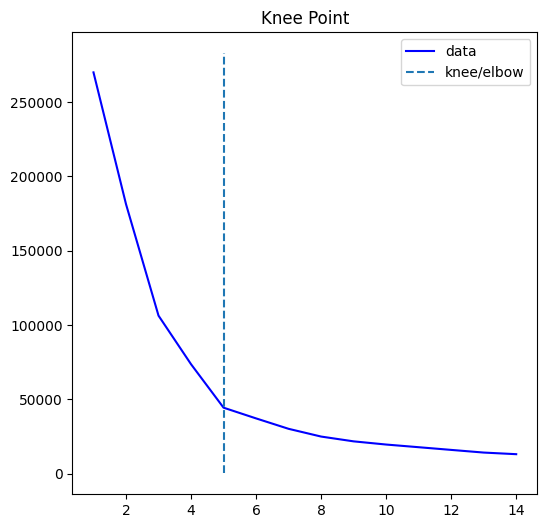

In [58]:
knl.plot_knee()

In [60]:
print(knl.knee)

5


# Optimized KMeans

In [61]:
Kmeans_opt=KMeans(n_clusters=knl.knee)

In [64]:
dataset['grouping_opt']=Kmeans_opt.fit_predict(dataset[['score','income']])

/home/shahriarkabir/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [65]:
dataset.head()

,CustomerID,Gender,age,income,score,grouping1,grouping_opt
0,1,Male,19,15,39,3,4
1,2,Male,21,15,81,5,0
2,3,Female,20,16,6,3,4
3,4,Female,23,16,77,5,0
4,5,Female,31,17,40,3,4


In [66]:
opt_centers=Kmeans_opt.cluster_centers_

In [68]:
opt_centers

array([[79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783]])

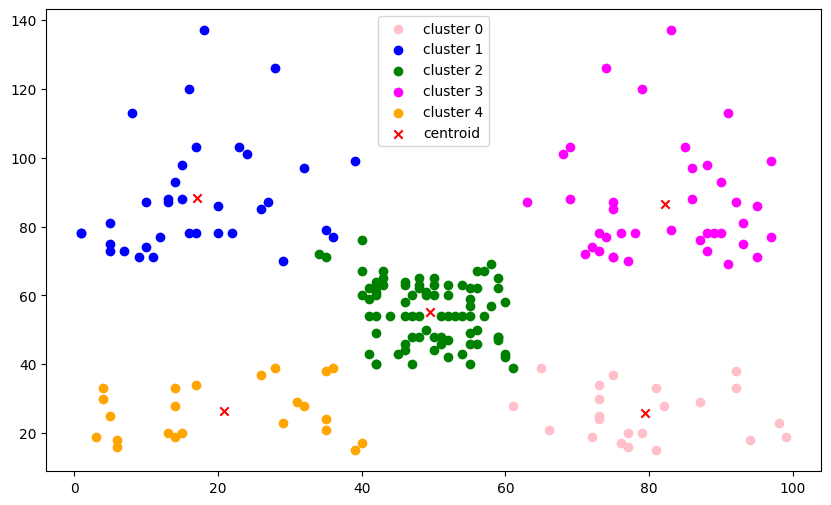

In [73]:
dataset0 = dataset[dataset.grouping_opt == 0]
dataset1 = dataset[dataset.grouping_opt == 1]
dataset2 = dataset[dataset.grouping_opt == 2]
dataset3 = dataset[dataset.grouping_opt == 3]
dataset4 = dataset[dataset.grouping_opt == 4]

plt.figure(figsize=(10,6))
plt.scatter(dataset0.score, dataset0.income, color='pink', label='cluster 0')
plt.scatter(dataset1.score, dataset1.income, color='blue', label='cluster 1')
plt.scatter(dataset2.score, dataset2.income, color='green', label='cluster 2')
plt.scatter(dataset3.score, dataset3.income, color='magenta', label='cluster 3')
plt.scatter(dataset4.score, dataset4.income, color='orange', label='cluster 4')

plt.scatter(opt_centers[:, 0], opt_centers[:,1], color='red', label='centroid',marker='x')

plt.legend()